**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
suppressMessages(suppressWarnings(source("../config/config_func.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [15]:
### set file directories
fdiry = file.path(FD_RES, "results", "comparison")
fname = "result.ranknorm.starrmpra.overlap.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types = FALSE)

dat_peak_starrmpra_ranknorm = dat
print(dim(dat))
head(dat)

[1] 1241    6


Peak,ASTARR,WSTARR,TMPRA,LMPRA,Mean
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr11:32870601-32871324,0.12006446,0.06204674,0.1958098,0.22804190,0.1514907
chr11:32874343-32875070,0.13053989,0.21434327,0.3231265,0.08098308,0.1872482
chr11:32884749-32885822,0.08541499,0.26349718,0.5439162,0.78565673,0.4196213
chr11:32901572-32902485,0.22320709,0.35455278,0.1571313,0.31748590,0.2630943
chr11:32903491-32904506,0.52377115,0.01531023,0.2095085,0.74053183,0.3722804
chr11:32910855-32912010,0.68573731,0.44641418,0.9129734,0.43755036,0.6206688


## Setup assay and peak order

In [45]:
dat = dat_peak_starrmpra_ranknorm
dat = dat %>% dplyr::arrange(Mean) %>% dplyr::select(Peak, Mean)

dat_score_starrmpra_mean = dat
VEC_TXT_PEAK  = dat$Peak
VEC_TXT_ASSAY = c("ASTARR", "WSTARR", "TMPRA", "LMPRA")
head(dat)

Peak,Mean
<chr>,<dbl>
chrX:48996933-48997220,0.01994359
chr20:56703281-56703575,0.03666398
chr8:128527915-128528670,0.06627720
chr20:56716655-56717126,0.07373086
chr11:33818437-33819007,0.07765915
chr16:892329-892989,0.08561644


## Plot STARR/MPRA

In [17]:
dat = dat_peak_starrmpra_ranknorm
dat = dat %>%
    dplyr::select(-Mean) %>%
    tidyr::gather(Assay, Score, -Peak) %>% 
    dplyr::mutate(
        Assay = factor(Assay, levels=VEC_TXT_ASSAY),
        Peak  = factor(Peak,  levels=VEC_TXT_PEAK),
    )

dat_score_starrmpra = dat
print(dim(dat))
head(dat)

[1] 4964    3


Peak,Assay,Score
<fct>,<fct>,<dbl>
chr11:32870601-32871324,ASTARR,0.12006446
chr11:32874343-32875070,ASTARR,0.13053989
chr11:32884749-32885822,ASTARR,0.08541499
chr11:32901572-32902485,ASTARR,0.22320709
chr11:32903491-32904506,ASTARR,0.52377115
chr11:32910855-32912010,ASTARR,0.68573731


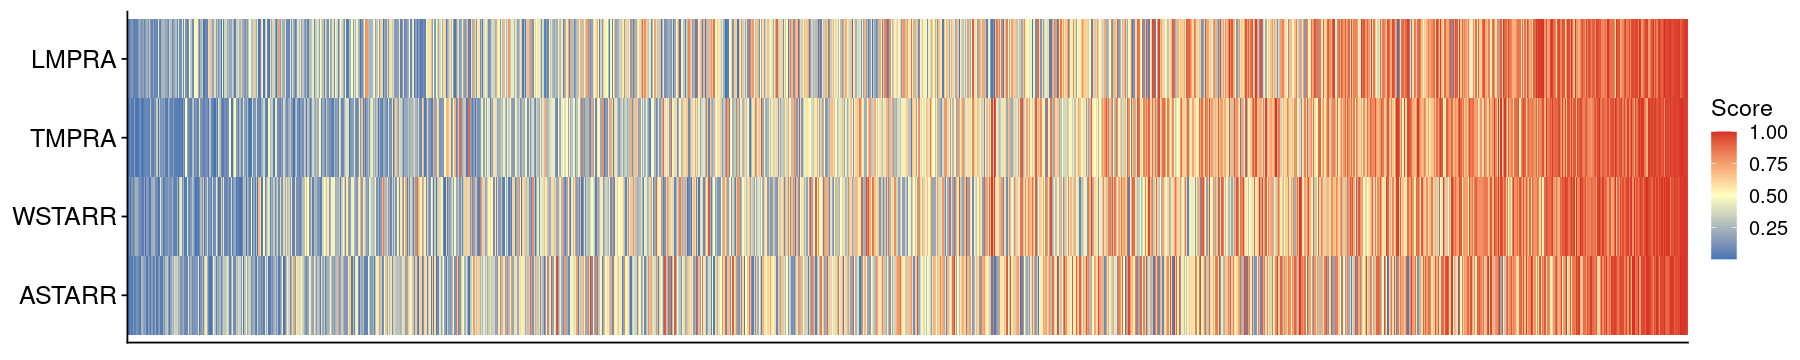

In [90]:
theme_fill = scale_fill_gradient2(
    low  = "#4575b4",
    mid  = "#ffffbf",
    high = "#d73027",
    midpoint = 0.5
)

theme_text = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    #axis.title.x = element_text(size = 20),
    axis.title.x = element_blank(),
    axis.title.y = element_blank()
)

theme_legend = theme(legend.position = "none")

dat = dat_score_starrmpra

gpt = ggplot(dat, aes(x=Peak, y=Assay, fill=Score)) +
    geom_tile() +
    labs(x="Open Chromatin Regions") +
    theme_cowplot() + 
    theme_text +
    theme_fill

gpt_score_starrmpra = gpt + theme(legend.position = "none")

options(repr.plot.height=3, repr.plot.width=15)
print(gpt)

In [7]:
### setup file path
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input", 
    "summary")
fname = "*summary*tsv"
fglob = file.path(fdiry, fname)

fpaths = Sys.glob(fglob)
fnames = basename(fpaths)
for(fname in fnames){cat(fname, "\n")}

peak.summary.ccre_v3.tsv 
peak.summary.ccre_v4.tsv 
peak.summary.chipseq_histone.tsv 
peak.summary.chipseq_tf_subset.tsv 
peak.summary.chipseq_tf.tsv 
peak.summary.chromHMM.tsv 
peak.summary.crispri_growth.dhs.active.tsv 
peak.summary.crispri_hcrff.casa.tsv 
peak.summary.encode_e2g_benchmark.active.tsv 
peak.summary.encode_e2g_benchmark.total.tsv 
peak.summary.encode_e2g_prediction.active.tsv 
peak.summary.encode_e2g_prediction.total.tsv 
peak.summary.enhancer_zscore_junke.ASTARR_AB.tsv 
peak.summary.enhancer_zscore_junke.ASTARR_A.tsv 
peak.summary.enhancer_zscore_junke.ASTARR_R.tsv 
peak.summary.enhancer_zscore_junke.ASTARR.tsv 
peak.summary.enhancer_zscore_junke.LMPRA_AB.tsv 
peak.summary.enhancer_zscore_junke.LMPRA_A.tsv 
peak.summary.enhancer_zscore_junke.LMPRA_R.tsv 
peak.summary.enhancer_zscore_junke.LMPRA.tsv 
peak.summary.enhancer_zscore_junke.STARRMPRA.tsv 
peak.summary.enhancer_zscore_junke.TMPRA_A.tsv 
peak.summary.enhancer_zscore_junke.TMPRA_R.tsv 
peak.summary.enhancer_zsc

In [28]:
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "KS91_K562_ASTARRseq_peak_macs_input", 
    "summary")

fnames = c(
    "peak.summary.ccre_v4.tsv",
    "peak.summary.chipseq_tf_subset.tsv",
    "peak.summary.chipseq_histone.tsv",
    "peak.summary.enhancer_zscore_junke.ASTARR_A.tsv",
    "peak.summary.enhancer_zscore_junke.WSTARR_A.tsv",
    "peak.summary.enhancer_zscore_junke.TMPRA_A.tsv",
    "peak.summary.enhancer_zscore_junke.LMPRA_A.tsv",
    "peak.summary.crispri_hcrff.casa.tsv",
    "peak.summary.encode_e2g_benchmark.active.tsv",
    "peak.summary.crispri_growth.dhs.active.tsv"
)

### setup labels for annotation file
lst = str_split(fnames, "\\.") 
lst = lapply(lst, function(vec){
    res = vec[-c(1, 2, length(vec))]
    res = paste(res, collapse=".")
    return(res)
})
vec = unlist(lst)

### import data
lst = lapply(fnames, function(fname){
    fpath = file.path(fdiry, fname)
    dat   = read_tsv(fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec

### assign and show
lst_dat_annot = lst
print(names(lst))
head(lst[[1]])

 [1] "ccre_v4"                        "chipseq_tf_subset"             
 [3] "chipseq_histone"                "enhancer_zscore_junke.ASTARR_A"
 [5] "enhancer_zscore_junke.WSTARR_A" "enhancer_zscore_junke.TMPRA_A" 
 [7] "enhancer_zscore_junke.LMPRA_A"  "crispri_hcrff.casa"            
 [9] "encode_e2g_benchmark.active"    "crispri_growth.dhs.active"     


Peak,Annotation,Label,Count,Region,Score,Note
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
chr1:10015-10442,ccre_v4,Low-DNase,1,chr1:10033-10250,0,EH38E2776516:Low-DNase
chr1:16015-16477,ccre_v4,Low-DNase,1,chr1:16097-16381,0,EH38E3951272:Low-DNase
chr1:17237-17772,ccre_v4,Low-DNase,1,chr1:17343-17642,0,EH38E3951273:Low-DNase
chr1:28903-29613,ccre_v4,Low-DNase,1,chr1:29320-29517,0,EH38E3951274:Low-DNase
chr1:115411-115986,ccre_v4,CA-CTCF,1,chr1:115562-115912,0,EH38E3951280:CA-CTCF
chr1:118518-118743,ccre_v4,Low-DNase,1,chr1:118508-118826,0,EH38E3951281:Low-DNase


In [65]:
### init
lst = list()

###
txt = "Enhancer (STARR/MPRA)"
vec = c("ASTARR_A", "WSTARR_A", "TMPRA_A", "LMPRA_A")
vec = paste("enhancer_zscore_junke", vec, sep=".")
lst[[txt]] = vec

txt = "CRISPRi"
vec = c("crispri_hcrff.casa", "crispri_growth.dhs.active", "encode_e2g_benchmark.active")
lst[[txt]] = vec

txt = "cCREs (K562; ENCODE V4)"
lst[[txt]] = "ccre_v4"

txt = "ChIP-seq Histone (K562)"
lst[[txt]] = "chipseq_histone"

txt = "ChIP-seq TF (K562)"
lst[[txt]] = "chipseq_tf_subset"

lst_vec_ant_group = lst
print(lst)

$`Enhancer (STARR/MPRA)`
[1] "enhancer_zscore_junke.ASTARR_A" "enhancer_zscore_junke.WSTARR_A"
[3] "enhancer_zscore_junke.TMPRA_A"  "enhancer_zscore_junke.LMPRA_A" 

$CRISPRi
[1] "crispri_hcrff.casa"          "crispri_growth.dhs.active"  
[3] "encode_e2g_benchmark.active"

$`cCREs (K562; ENCODE V4)`
[1] "ccre_v4"

$`ChIP-seq Histone (K562)`
[1] "chipseq_histone"

$`ChIP-seq TF (K562)`
[1] "chipseq_tf_subset"



In [66]:
lst = lst_vec_ant_group

lst = lapply(lst, function(vec){
    ### get annotation
    lst = lst_dat_annot
    dat = bind_rows(lst[vec])
    lst = split(dat, dat$Label)
    lst_annot = lst

    ### annotate peaks
    dat = data.frame(Peak = VEC_TXT_PEAK)
    for (idx in names(lst_annot)){
        ant = lst_annot[[idx]]
        vec = ant$Peak
        dat[[idx]] = ifelse(dat$Peak %in% vec, "1", "0")
    }

    ### arrange results
    dat = dat %>% 
        tidyr::gather(Label, Value, -Peak) %>%
        dplyr::mutate(Peak  = factor(Peak,  levels=VEC_TXT_PEAK))
})

lst_dat_ant_group = lst
print(names(lst))
head(lst[[1]])

[1] "Enhancer (STARR/MPRA)"   "CRISPRi"                
[3] "cCREs (K562; ENCODE V4)" "ChIP-seq Histone (K562)"
[5] "ChIP-seq TF (K562)"     


,Peak,Label,Value
,<fct>,<chr>,<chr>
1,chrX:48996933-48997220,ASTARR_A,0
2,chr20:56703281-56703575,ASTARR_A,0
3,chr8:128527915-128528670,ASTARR_A,0
4,chr20:56716655-56717126,ASTARR_A,0
5,chr11:33818437-33819007,ASTARR_A,0
6,chr16:892329-892989,ASTARR_A,0


In [67]:
dat = lst_dat_ant_group[[1]]
dat = dat %>% dplyr::left_join(dat_score_starrmpra_mean, by="Peak")
lst = split(dat, dat$Label)
lst = lapply(lst, function(dat){
    #print(head(dat))
    vec_num_x = as.numeric(dat$Mean)
    vec_num_y = as.numeric(dat$Value)
    num_corr  = cor(vec_num_x, vec_num_y, method = "spearman")
    names(num_corr) = "Correlation"
    return(num_corr)
})
dat = bind_rows(lst, .id="Label")
dat = dat %>% dplyr::arrange(Correlation)
vec_txt_label = dat$Label
dat

Label,Correlation
<chr>,<dbl>
ASTARR_A,0.2895699
WSTARR_A,0.4665796
TMPRA_A,0.4995334
LMPRA_A,0.5411832


In [32]:
THEME_TEXT = theme(
    axis.ticks.x = element_blank(),
    axis.text.x  = element_blank(),
    axis.text.y  = element_text(size = 15),
    axis.title.x = element_blank(),
    axis.title.y = element_blank(),
    plot.title = element_text(face = "bold", size = 17)
    #plot.title = element_text(face = "plain", size = 17)
)

In [83]:
theme_fill   = scale_fill_manual(values = c("1" = "black", "0" = "white"))
theme_text   = THEME_TEXT
theme_legend = theme(legend.position = "none")

lst = lst_dat_ant_group
lst = lapply(names(lst), function(txt){

    dat = lst_dat_ant_group[[txt]]
    dat = dat %>% dplyr::left_join(dat_score_starrmpra_mean, by="Peak")
    lst = split(dat, dat$Label)
    lst = lapply(lst, function(dat){
        #print(head(dat))
        vec_num_x = as.numeric(dat$Mean)
        vec_num_y = as.numeric(dat$Value)
        num_corr  = cor(vec_num_x, vec_num_y, method = "spearman")
        names(num_corr) = "Correlation"
        return(num_corr)
    })
    dat = bind_rows(lst, .id="Label")
    dat = dat %>% dplyr::arrange(Correlation)
    vec_txt_label = dat$Label

    dat = lst_dat_ant_group[[txt]]
    dat = dat %>% 
        dplyr::mutate(
            Peak  = factor(Peak,  levels=VEC_TXT_PEAK),
            Label = factor(Label, levels = vec_txt_label)
        )
    gpt = ggplot(dat, aes(x=Peak, y=Label, fill=Value)) +
        geom_tile() +
        labs(title = txt) +
        theme_cowplot() +
        theme_fill +
        theme_text +
        theme_legend

    return(gpt)
})

lst_gpt = lst

In [84]:
length(lst_gpt)

[1] 5

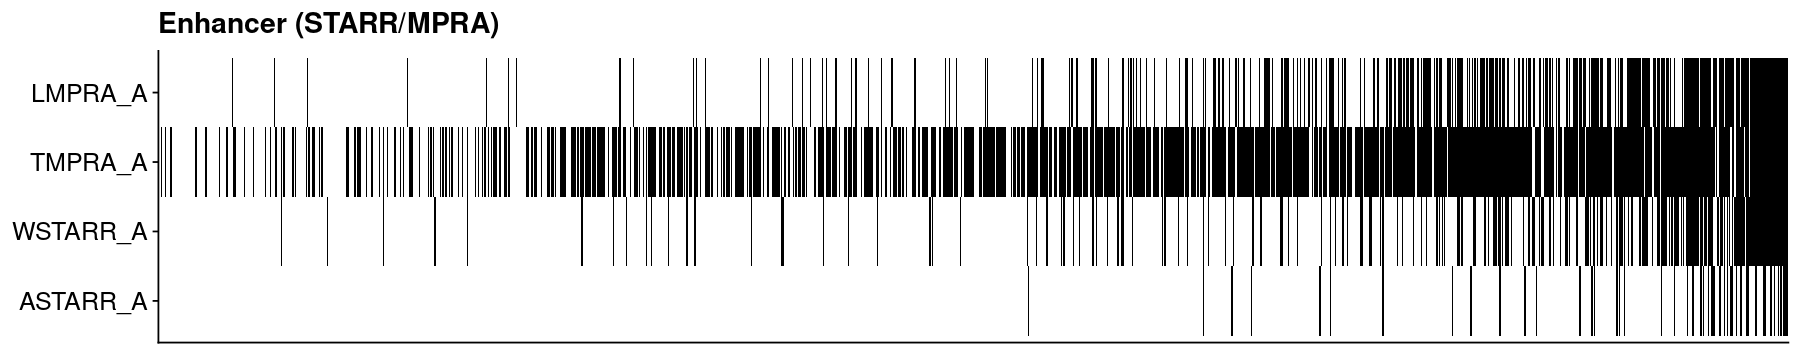

In [85]:
options(repr.plot.height=3, repr.plot.width=15)
lst_gpt[[1]]

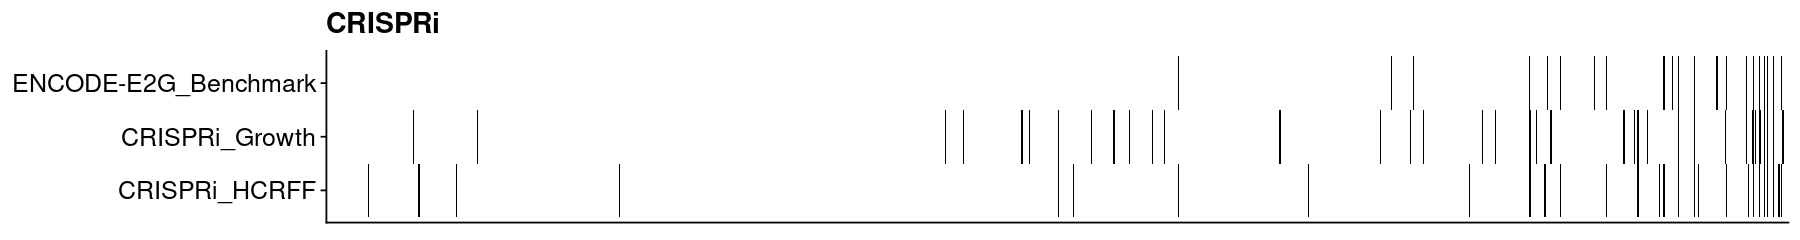

In [86]:
options(repr.plot.height=2, repr.plot.width=15)
lst_gpt[[2]]

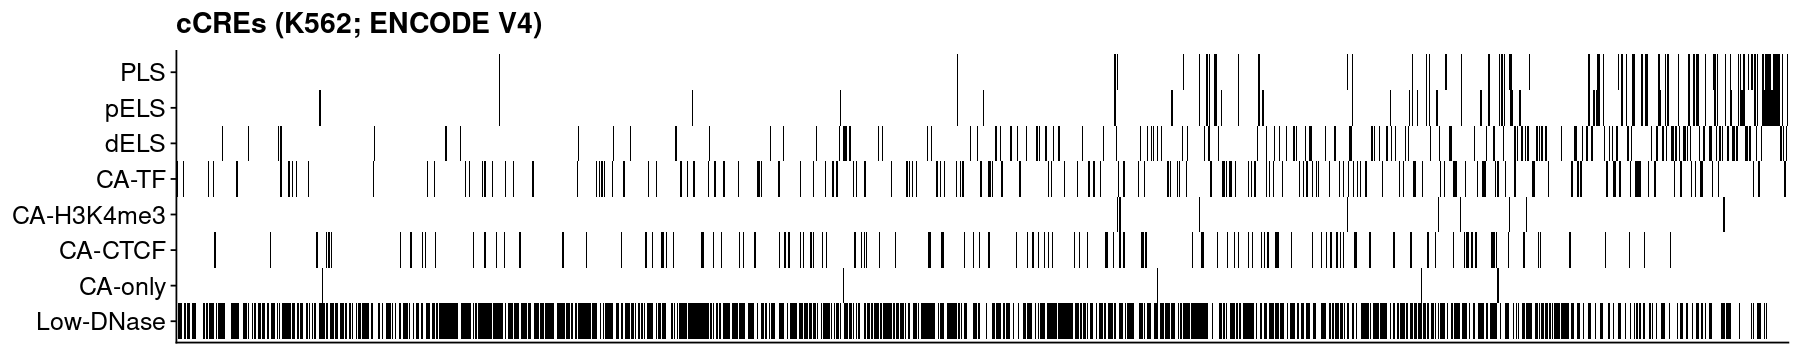

In [87]:
options(repr.plot.height=3, repr.plot.width=15)
lst_gpt[[3]]

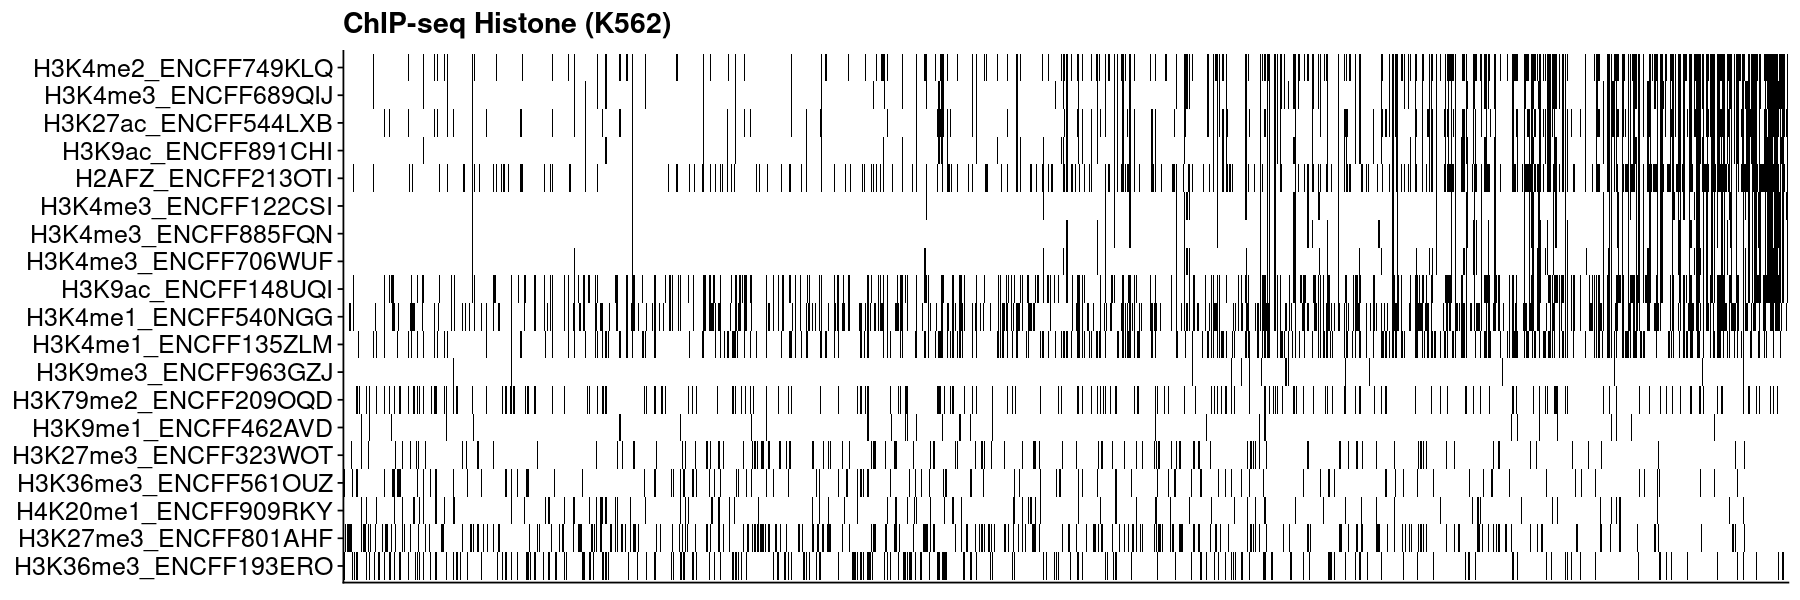

In [88]:
options(repr.plot.height=5, repr.plot.width=15)
lst_gpt[[4]]

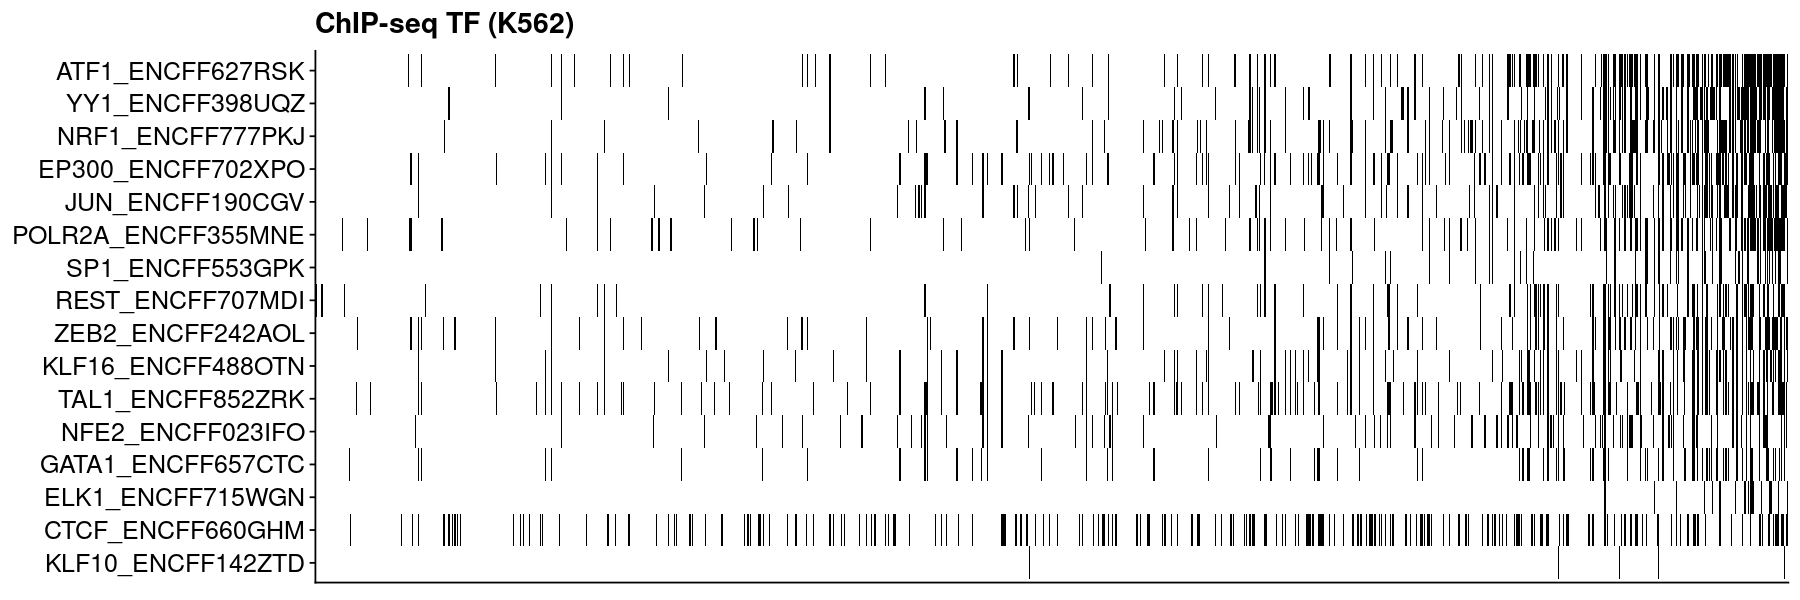

In [89]:
options(repr.plot.height=5, repr.plot.width=15)
lst_gpt[[5]]